Data preprocessing 

In [1]:
import os
import numpy as np

data_path="C:\\Users\\ASHAN\\Desktop\\Dataset_01"
catagories=os.listdir(data_path)
print(catagories)
labels=np.arange(len(catagories))
print(labels)
label_dict=dict(zip(catagories,labels))
print(label_dict)


['cats', 'Dogs']
[0 1]
{'cats': np.int64(0), 'Dogs': np.int64(1)}


In [2]:
import cv2
img_size=50

data=[]
target=[]


for catagory in catagories:
    
    imgs_path=os.path.join(data_path,catagory)
    #print(img_path)
    img_names=os.listdir(imgs_path)
    
    
    for img_name in img_names:
        img_path=os.path.join(imgs_path,img_name)
        #print(img_path)
        try:
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(img_size,img_size))
            data.append(img)
            target.append(label_dict[catagory])
        except Exception as e :
            print(img_path,e)

    

In [3]:
data_new=np.array(data)
target_new=np.array(target)

In [4]:
print(data_new.shape)
print(target_new.shape)

(1058, 50, 50)
(1058,)


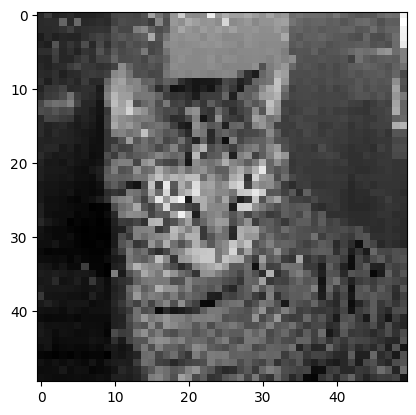

In [5]:
from matplotlib import pyplot as plt

plt.imshow(data_new[1],cmap='gray')

In [8]:
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1) #converting to 4D cnn wants to 4D input
print(data_new.shape)

(1058, 50, 50, 1)


In [9]:
data_new=data_new/255 #normalizing/scaling

In [10]:
from tensorflow.keras.utils import to_categorical
import numpy as np
target_new =to_categorical(target_new)

In [11]:
target_new.shape


(1058, 2)

In [12]:
target_new[0]

array([1., 0.])

In [13]:
np.save('data',data_new)
np.save('target',target_new)

CNN Training

In [14]:
import numpy as np

data = np.load("data.npy") # Replace with your actual file path
target=np.load("target.npy")
print(target)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [15]:
print(data.shape)
print(target.shape)

(1058, 50, 50, 1)
(1058, 2)


In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Input, Dropout

model = Sequential()

model.add(Input(shape=(50, 50, 1)))  

# First Conv Layer
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  # Dropout added

# Second Conv Layer
model.add(Conv2D(32, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  # Dropout added

# Third Conv Layer
model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))  # Dropout added

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout added
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))  # Dropout added
model.add(Dense(2, activation='sigmoid'))

# Fixing loss function typo from "catagorical_crossentropy" to "categorical_crossentropy"
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 20, 20, 32)          │         102,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,188 (543.70 KB)

 Trainable params: 139,188 (543.70 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [41]:
print(train_data.shape)
print(test_data.shape)

(846, 50, 50, 1)
(212, 50, 50, 1)


In [42]:
print(train_target)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [43]:
model.fit(train_data,train_target,epochs=20,validation_data=(test_data,test_target),batch_size=16)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.4991 - loss: 0.6936 - val_accuracy: 0.4575 - val_loss: 0.6943
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.5117 - loss: 0.6942 - val_accuracy: 0.4575 - val_loss: 0.6940
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - accuracy: 0.5001 - loss: 0.6935 - val_accuracy: 0.4575 - val_loss: 0.6945
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 311ms/step - accuracy: 0.4992 - loss: 0.6930 - val_accuracy: 0.4575 - val_loss: 0.6966
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 311ms/step - accuracy: 0.5118 - loss: 0.6938 - val_accuracy: 0.4575 - val_loss: 0.6954
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - accuracy: 0.5056 - loss: 0.6935 - val_accuracy: 0.4575 - val_loss: 0.6958
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - accuracy: 0.5140 - loss: 0.6931 - val_accuracy: 0.4575 - val_loss: 0.6941
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.4924 - loss: 0.6936 - val_accu

Text(0, 0.5, 'loss')

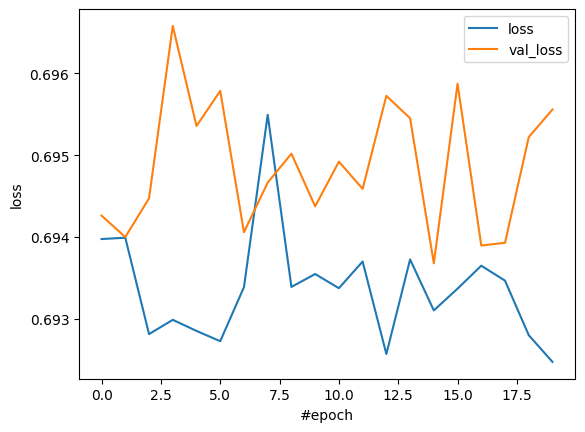

In [44]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel("#epoch")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

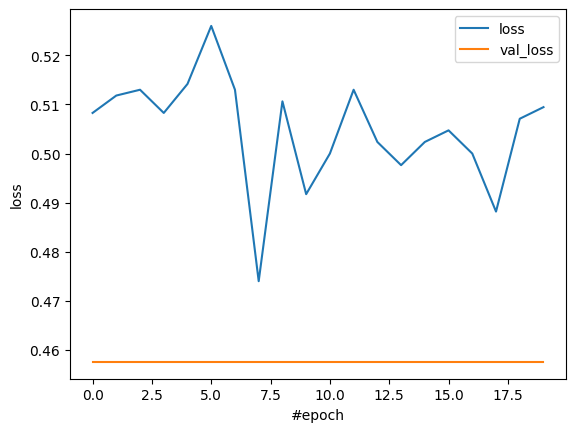

In [45]:
plt.plot(model.history.history['accuracy'],label='loss')
plt.plot(model.history.history['val_accuracy'],label='val_loss')
plt.legend()
plt.xlabel("#epoch")
plt.ylabel("loss")
